<div style="width: 50%; float: left">
    <img src="../../../../ups.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>NRO. PRUEBA: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">PRUEBA PRÁCTICA</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Prueba Práctica Unidad 1
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Generar gráficas para entender y procesar los datos:

- Gráficas y reportes del total de personas vacunadas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv')
FMT = '%d/%m/%Y'
date = df['fecha']
df['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("20/01/2021", FMT)).days)

df

,fecha,dosis_total,primera_dosis,segunda_dosis,fecha_no
0,21/01/2021,0,0,0,1
1,22/01/2021,108,108,0,2
2,27/01/2021,2982,2982,0,7
3,04/02/2021,6228,6228,0,15
4,17/02/2021,8190,6228,1962,28
5,24/02/2021,24492,20784,3708,35
6,01/03/2021,42114,35886,6228,40
7,04/03/2021,59316,53088,6228,43
8,05/03/2021,71148,64920,6228,44
9,08/03/2021,74472,68244,6228,47


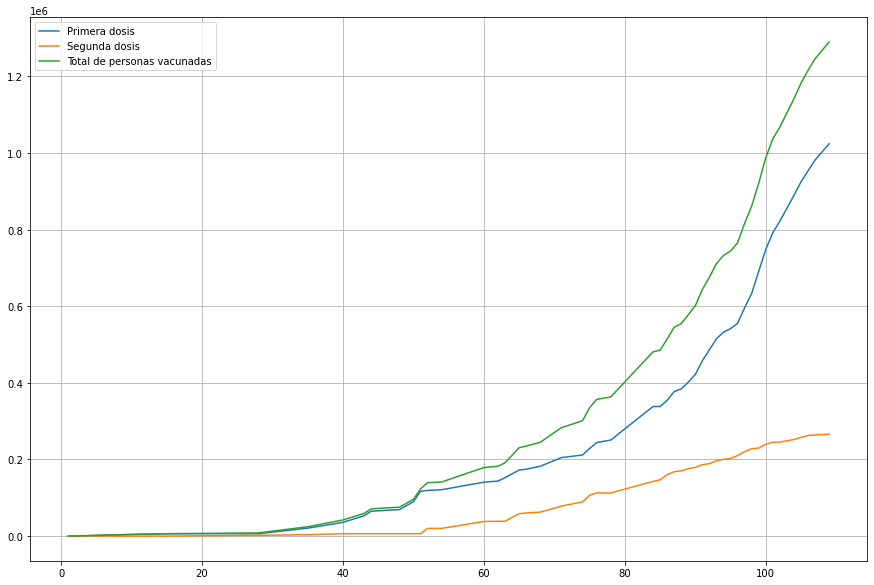

In [3]:
plt.figure(figsize=(15,10))
plt.grid(True)

plt.plot(df['fecha_no'], df['primera_dosis'], label='Primera dosis')
plt.plot(df['fecha_no'], df['segunda_dosis'], label='Segunda dosis')
plt.plot(df['fecha_no'], df['dosis_total'], label='Total de personas vacunadas')

plt.legend(loc='upper left')
plt.show()

- Gráfico de pie por fabricante de la vacuna

In [4]:
df_fab = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv')
df_fab

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021
5,Pfizer/BioNTech,73710,10/03/2021
6,Oxford/AstraZeneca,84000,17/03/2021
7,Pfizer/BioNTech,62010,17/03/2021
8,Pfizer/BioNTech,65520,24/03/2021
9,Pfizer/BioNTech,66690,31/03/2021


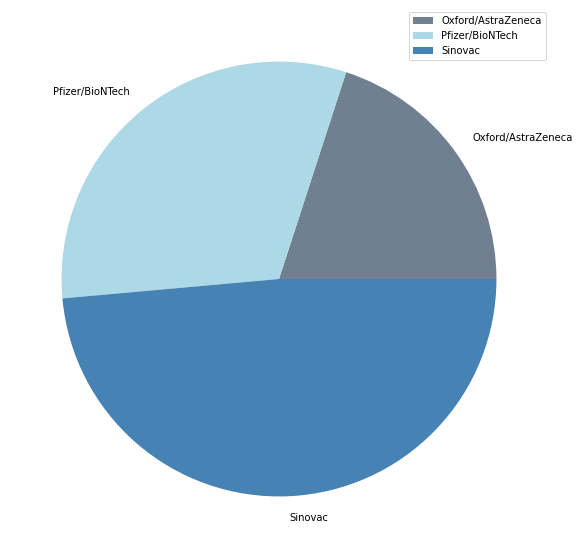

In [5]:
df_pie = df_fab.groupby(['vaccine']).sum()
df_pie.index
colors = ['slategray', 'lightblue', 'steelblue']
plt.figure(figsize=(10,10))

plt.pie(df_pie['total'], labels=df_pie.index, startangle = 0, colors=colors)
plt.legend()
plt.show()

- Histograma de vacunas por mes de llegada y fabricante

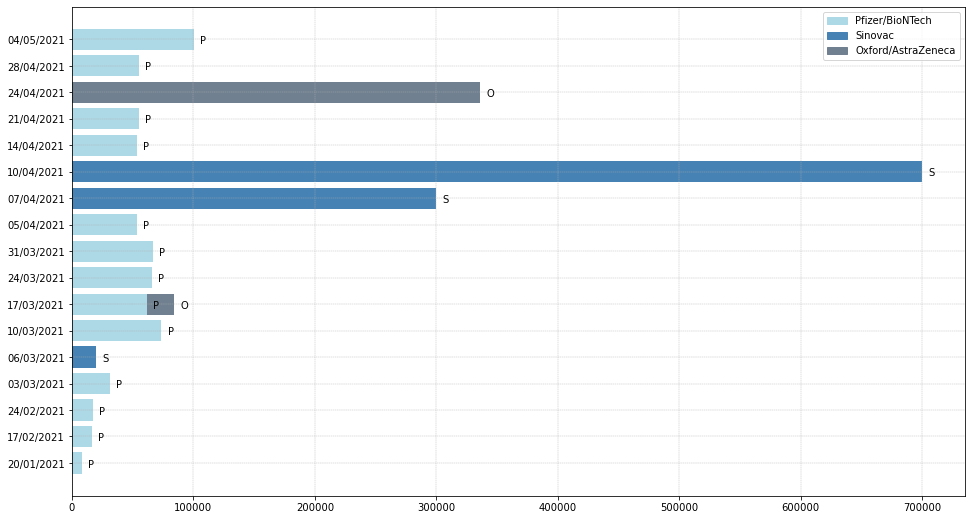

In [6]:
fig, ax = plt.subplots(figsize =(16, 9))
colors = ['lightblue' if i == 'Pfizer/BioNTech' else 'steelblue' if i == 'Sinovac' else 'slategray' for i in df_fab['vaccine'] ]

ax.barh(df_fab['arrived_at'], df_fab['total'], color=colors)
plt.grid(linestyle='--', linewidth=0.4)

for i, el in enumerate(ax.patches):
    plt.text(el.get_width() + 5000, el.get_y() + 0.25, str(df_fab['vaccine'][i])[0] )

l = mpatches.Patch(color='lightblue', label='Pfizer/BioNTech')
s = mpatches.Patch(color='steelblue', label='Sinovac')
a = mpatches.Patch(color='slategray', label='Oxford/AstraZeneca')
plt.legend(handles=[l, s, a])
plt.show()

In [7]:
df_h = df_fab
df_h['month'] = [i[3:5] for i in df_h['arrived_at']]
df_h = df_h.drop(['arrived_at'], axis=1)
dfh = df_h.groupby(['month', 'vaccine']).sum()
df_h

,vaccine,total,month
0,Pfizer/BioNTech,8190,01
1,Pfizer/BioNTech,16380,02
2,Pfizer/BioNTech,17550,02
3,Pfizer/BioNTech,31590,03
4,Sinovac,20000,03
5,Pfizer/BioNTech,73710,03
6,Oxford/AstraZeneca,84000,03
7,Pfizer/BioNTech,62010,03
8,Pfizer/BioNTech,65520,03
9,Pfizer/BioNTech,66690,03


In [8]:
mes = ['Enero' if i[0] == '01' else 'Febrero'if i[0] == '02' else 'Marzo' if i[0] == '03' else 'Abril' if i[0] == '04' else 'Mayo' for i in dfh.index]
fab = [i[1] for i in dfh.index]

dfh['mes'] = mes
dfh['fab'] = fab
dfh = dfh.sort_values(by=['total'], ascending=False)
dfh.reset_index(drop=True, inplace=True)

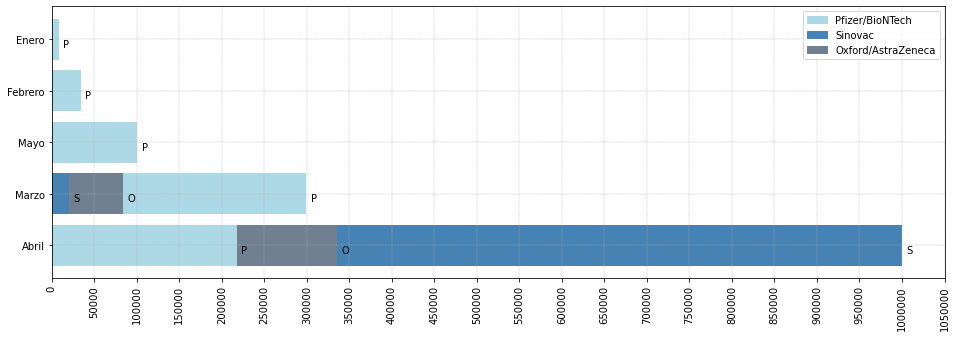

In [9]:
fig, ax = plt.subplots(figsize =(16, 5))
colors = ['lightblue' if i == 'Pfizer/BioNTech' else 'steelblue' if i == 'Sinovac' else 'slategray' for i in dfh['fab'] ]

ax.barh(dfh['mes'], dfh['total'], color=colors)
plt.grid(linestyle='--', linewidth=0.4)

for i, el in enumerate(ax.patches):
    plt.text(el.get_width() + 5000, el.get_y() + 0.25, str(dfh['fab'][i])[0] )

l = mpatches.Patch(color='lightblue', label='Pfizer/BioNTech')
s = mpatches.Patch(color='steelblue', label='Sinovac')
a = mpatches.Patch(color='slategray', label='Oxford/AstraZeneca')
plt.xticks(np.arange(0, 1100000, step=50000), rotation=90)
plt.legend(handles=[l, s, a])
try:
    plt.ticklabel_format(style='plain')
except AttributeError:
    print('')
plt.show()

- Generar un reporte parametrizado

Ingrese fecha inicial: 01/01/2021
Ingrese fecha final: 01/05/2021

Primera dosis:  791822
Segunda dosis:  244972
Total dosis:  1036794
Número de vacunas:  1999260


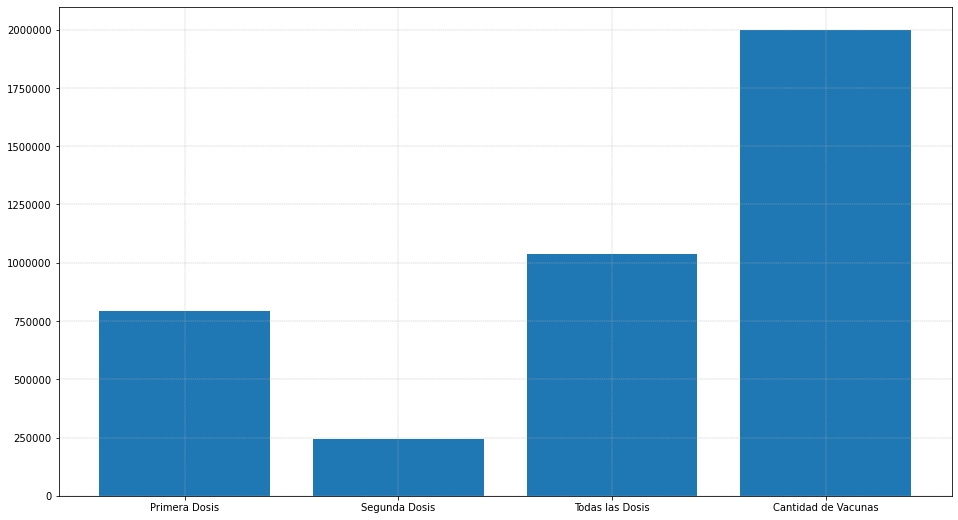

In [10]:
f1, f2 = input('Ingrese fecha inicial: '), input('Ingrese fecha final: ')
f1 = datetime.strptime(f1, '%d/%m/%Y')
f2 = datetime.strptime(f2, '%d/%m/%Y')


i1 = 0
i2 = df.index.stop-1
dosis1 = 0
dosis2 = 0
dosisT = 0
vacunas = 0 

for i, row in df.iterrows():
    f = row['fecha']
    f = datetime.strptime(f, '%d/%m/%Y')
    if f1 >= f:
        i1 = i-1
    if f2 < f:
        i2 = i-1
        break
print('')        
if i1 == -1:
    dosis1 = df['primera_dosis'][i2]
    dosis2 = df['segunda_dosis'][i2]
    dosisT = df['dosis_total'][i2]
    
else:
    dosis1 = df['primera_dosis'][i2] - df['primera_dosis'][i1]
    dosis2 = df['segunda_dosis'][i2] - df['segunda_dosis'][i1]
    dosisT = df['dosis_total'][i2] - df['dosis_total'][i1]
     
for i, row in df_fab.iterrows():
    f = row['arrived_at']
    f = datetime.strptime(f, '%d/%m/%Y')
    if f >= f1 and f < f2:
        vacunas += row['total']

print('Primera dosis: ', dosis1)
print('Segunda dosis: ', dosis2)
print('Total dosis: ', dosisT)
print('Número de vacunas: ', vacunas)

fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(['Primera Dosis', 'Segunda Dosis', 'Todas las Dosis', 'Cantidad de Vacunas'], [dosis1, dosis2, dosisT, vacunas])
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.grid(linestyle='--', linewidth=0.4)
plt.show()

- Generar un modelo matemático de predicción basado en regresión, del proceso de vacunación en base al número actual de vacunados y a la llegada de nuevas vacunas.

In [11]:
df_vac = df_fab
FMT = '%d/%m/%Y'
date = df_vac['arrived_at']
df_vac['fecha_no'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("20/01/2021", FMT)).days)

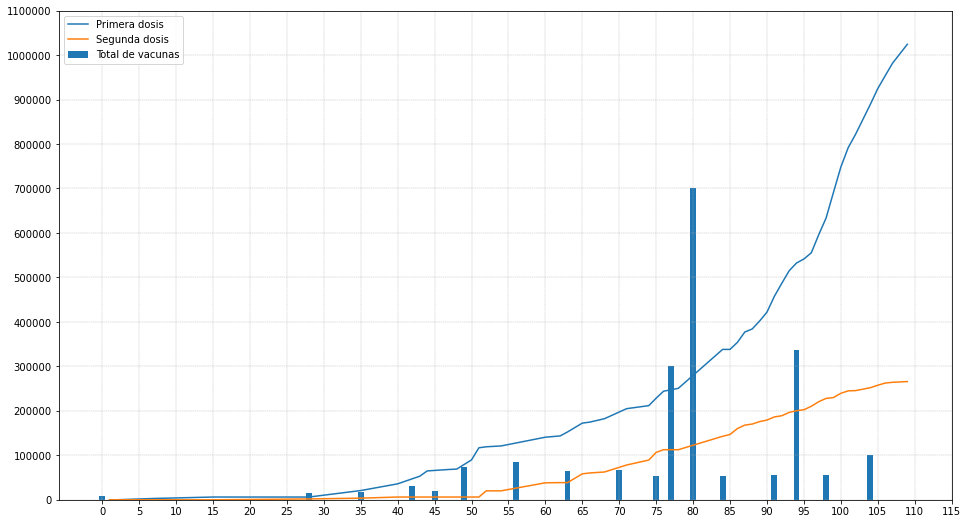

In [18]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.plot(df['fecha_no'], df['primera_dosis'], label='Primera dosis')
plt.plot(df['fecha_no'], df['segunda_dosis'], label='Segunda dosis')
plt.bar(df_vac['fecha_no'], df_vac['total'], label='Total de vacunas')
try:
    plt.ticklabel_format(axis='y', style='plain')
except AttributeError:
    print('')
plt.grid(linestyle='--', linewidth=0.4)
plt.xticks(np.arange(0, 120, step=5))
plt.yticks(np.arange(0, 1200000, step=100000))
plt.legend(loc='upper left')
plt.show()

In [16]:
xtrainP, xtestP, ytrainP, ytestP = tts(df['fecha_no'], df['primera_dosis'], test_size=0.2)
xtrainS, xtestS, ytrainS, ytestS = tts(df['fecha_no'], df['segunda_dosis'], test_size=0.2)
xtrainV, xtestV, ytrainV, ytestV = tts(df_vac['fecha_no'], df_vac['total'], test_size=0.2)

In [20]:
model = LinearRegression()
model.fit(np.array(xtrainP).reshape(-1, 1), ytrainP)
p = np.poly1d(np.polyfit(xtrainP, ytrainP, 4))

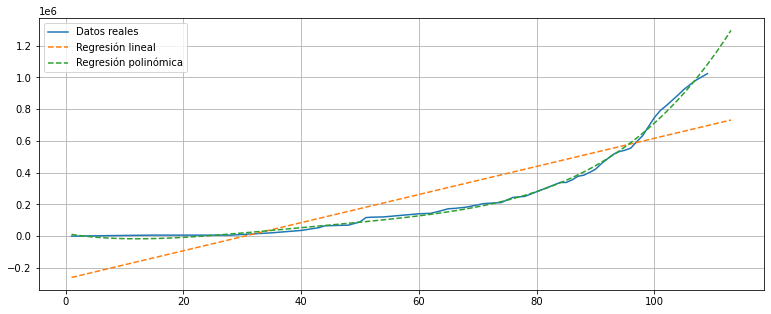

In [25]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(True)

plt.plot(df['fecha_no'], df['primera_dosis'], '-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()

In [26]:
model = LinearRegression()
model.fit(np.array(xtrainS).reshape(-1, 1), ytrainS)
p = np.poly1d(np.polyfit(xtrainS, ytrainS, 4))

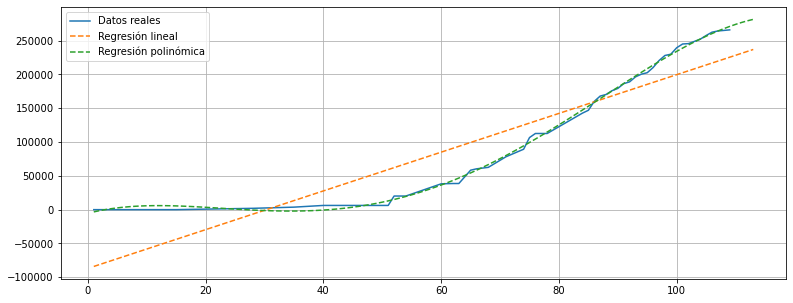

In [27]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(True)

plt.plot(df['fecha_no'], df['segunda_dosis'], '-', label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()

In [32]:
model = LinearRegression()
model.fit(np.array(xtrainV).reshape(-1, 1), ytrainV)
p = np.poly1d(np.polyfit(xtrainV, ytrainV, 3))

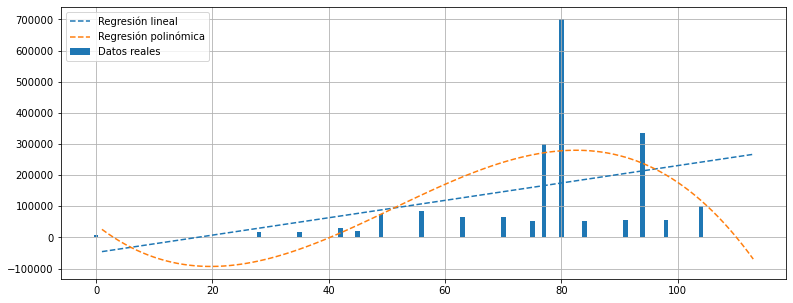

In [33]:
pred_x = list(range(min(df['fecha_no']),max(df['fecha_no'])+5))
Lpred_y = model.predict(np.array(pred_x).reshape(-1, 1))
Ppred_y = p(pred_x)

plt.figure(figsize=(13,5))
plt.grid(True)

plt.bar(df_vac['fecha_no'], df_vac['total'], label='Datos reales')
plt.plot(pred_x, Lpred_y, '--', label='Regresión lineal')
plt.plot(pred_x, Ppred_y, '--', label='Regresión polinómica')

plt.legend(loc='upper left')
plt.show()